In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [4]:
list(mnist)

['data',
 'target',
 'frame',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'categories',
 'url']

In [5]:
mnist.data.shape

(70000, 784)

In [6]:
mnist.target.shape

(70000,)

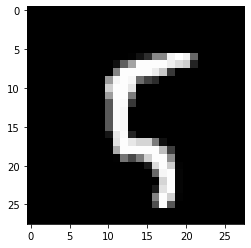

In [7]:
plt.imshow(mnist.data[100].reshape(28,28),cmap='gray')

In [8]:
images = (0.99 * mnist.data)/ 255

In [9]:
print(np.max(images[0]),np.min(images[0]))

0.99 0.0


In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [11]:
num = mnist.target.shape[0]
print(num)

70000


In [12]:
# one-hot encode the y_true values
y_true = np.zeros((num,10))
for i in range(num):
    y_true[i,int(mnist.target[i])] = 1

In [13]:
X_train,X_test,y_train,y_test = \
train_test_split(mnist.data,
                 y_true,
                 test_size = 0.8, 
                 random_state = 42)
size = X_train.shape[0]
print(size)
#for i in range(size):
#    print(np.argmax(y_train[i]))

14000


In [14]:
X_valid,y_valid = X_test[:14000],y_test[:14000]
X_test_final,y_test_final = X_test[14000:],y_test[14000:]

In [15]:
print(X_valid.shape)
print(X_test_final.shape)
test_size = X_test_final.shape[0]

(14000, 784)
(42000, 784)


In [38]:
input_layer = 784
hidden_layer = 128
output_layer = 10

w1 = np.random.normal(0,
                      1/np.sqrt(input_layer),
                      size = (hidden_layer,input_layer))

w2 = np.random.normal(0,
                      1/np.sqrt(hidden_layer),
                      size = (output_layer,hidden_layer))

b1 = np.ones((hidden_layer,1))

b2 = np.ones((output_layer,1))

lr = .001
epochs = [x for x in range(100)]
train_error = []
valid_error = []
Error = 0
for epoch in epochs:
    error = 0
    cnt = 0
    cnt_v = 0
    error_v = 0
    for i in range(size):
        # get the true value
        t  = y_train[i].reshape(output_layer,1)
        tV = y_valid[i].reshape(output_layer,1)
        # set nodes
        x0 = X_train[i].reshape(input_layer,1)
        x1 = sigmoid(w1.dot(x0)+b1)
        x2 = sigmoid(w2.dot(x1)+b2)
        # calculate errors
        error += np.sum((x2 - t)*(x2 - t))
        derr = (x2 - t)
        
        x_valid_0 = X_valid[i].reshape(input_layer,1)
        x_valid_1 = sigmoid(w1.dot(x_valid_0)+b1)
        x_valid_2 = sigmoid(w2.dot(x_valid_1)+b2)
        error_v += np.sum((x_valid_2 - tV)**2)
        
        
        #calculate deltas
        delta_layer2 = (derr * (x2 * (1-x2)))        
        delta_layer1 = (((w2.T).dot(delta_layer2)) * (x1 * (1-x1)))
        
        #clean up notation
        w2 = w2 - lr * delta_layer2.dot(x1.T)
        b2 = b2 - lr * delta_layer2
        w1 = w1 - lr * delta_layer1.dot(x0.T)
        b1 = b1 - lr * delta_layer1
        #calculate how many are correct, for accuracy
        
        cnt_v += np.argmax(x_valid_2) == np.argmax(tV)
        cnt += np.argmax(x2) == np.argmax(t)
    train_error.append(error)
    valid_error.append(error_v)
    if epoch%1 == 0:
        print(f'Epoch {epoch}')
        print(f'Error is {error:.2f}; Accuracy is {100*cnt/size:.2f}%')
        print(f'Validation error is {error_v:.2f} and validation accuracy is {100*cnt_v/size:.2f}%')
        print("---------------------------------------------")
print(f'Final training accuracy is {100*cnt/size:.2f}%')

Epoch 0
Error is 10417.42; Accuracy is 57.81%
Validation error is 10438.13 and validation accuracy is 57.09%
---------------------------------------------
Epoch 1
Error is 6229.12; Accuracy is 81.74%
Validation error is 6263.28 and validation accuracy is 81.74%
---------------------------------------------
Epoch 2
Error is 4684.08; Accuracy is 86.27%
Validation error is 4761.67 and validation accuracy is 85.80%
---------------------------------------------
Epoch 3
Error is 3885.36; Accuracy is 88.03%
Validation error is 3954.07 and validation accuracy is 87.70%
---------------------------------------------
Epoch 4
Error is 3392.03; Accuracy is 89.18%
Validation error is 3486.33 and validation accuracy is 88.79%
---------------------------------------------
Epoch 5
Error is 3048.21; Accuracy is 90.17%
Validation error is 3181.97 and validation accuracy is 89.31%
---------------------------------------------
Epoch 6
Error is 2836.44; Accuracy is 90.51%
Validation error is 2967.92 and val

/Users/christiansutton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epoch 7
Error is 2660.46; Accuracy is 90.89%
Validation error is 2824.81 and validation accuracy is 90.05%
---------------------------------------------
Epoch 8
Error is 2495.96; Accuracy is 91.50%
Validation error is 2670.76 and validation accuracy is 90.36%
---------------------------------------------
Epoch 9
Error is 2377.99; Accuracy is 91.97%
Validation error is 2583.52 and validation accuracy is 90.31%
---------------------------------------------
Epoch 10
Error is 2284.16; Accuracy is 91.99%
Validation error is 2484.21 and validation accuracy is 90.80%
---------------------------------------------
Epoch 11
Error is 2222.81; Accuracy is 92.16%
Validation error is 2434.51 and validation accuracy is 90.94%
---------------------------------------------
Epoch 12
Error is 2124.08; Accuracy is 92.54%
Validation error is 2354.62 and validation accuracy is 91.21%
---------------------------------------------
Epoch 13
Error is 2052.28; Accuracy is 92.72%
Validation error is 2267.52 and v

In [39]:
cnt = 0
print(f'Number of test samples is: {test_size}')
for i in range(test_size):
    t = y_test_final[i].reshape(output_layer,1)
    # set nodes
    x0 = X_test_final[i].reshape(input_layer,1)
    x1 = sigmoid(w1.dot(x0)+b1)
    x2 = sigmoid(w2.dot(x1)+b2)
    cnt += np.argmax(x2) == np.argmax(t)
print(f'Testing accuracy is {100 * cnt/(test_size):.2f}%')

Number of test samples is: 42000


/Users/christiansutton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Testing accuracy is 94.03%


Please input a digit:


 420


The queried digit is 8.  The correct digit is 8


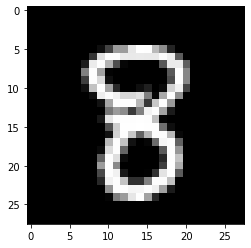

In [40]:
print('Please input a digit:')
i = int(input())
blind = X_test_final[i].reshape(28,28)                                 
plt.imshow(blind,cmap='gray')
x0 = X_test_final[i].reshape(input_layer,1)
x1 = sigmoid(w1.dot(x0)+b1)
x2 = sigmoid(w2.dot(x1)+b2)
print(f'The queried digit is {np.argmax(x2)}.  The correct digit is {np.argmax(y_test_final[i])}')

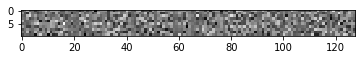

In [41]:
plt.imshow(w2,cmap='gray')

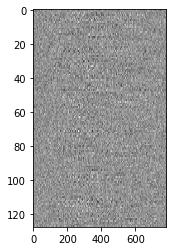

In [42]:
plt.imshow(w1,aspect=10,cmap='gray')

In [43]:
len(train_error)

100

In [48]:
x = np.arange(100)

In [49]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [50]:
tr = np.array(train_error)
vd = np.array(valid_error)

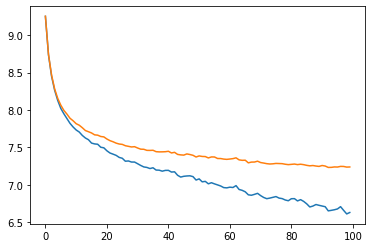

In [52]:
plt.plot(x,np.log(tr),label='train')
plt.plot(x,np.log(vd),label='valid')
plt.show()